In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# IMPORTING DATA

In [21]:
mall_df = pd.read_csv('Mall_Customers.csv')
copy_df = mall_df
temp_df = copy_df
copy_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
copy_df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
copy_df.drop(columns=['CustomerID'],inplace = True)

In [11]:
copy_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## VISUALIZATION

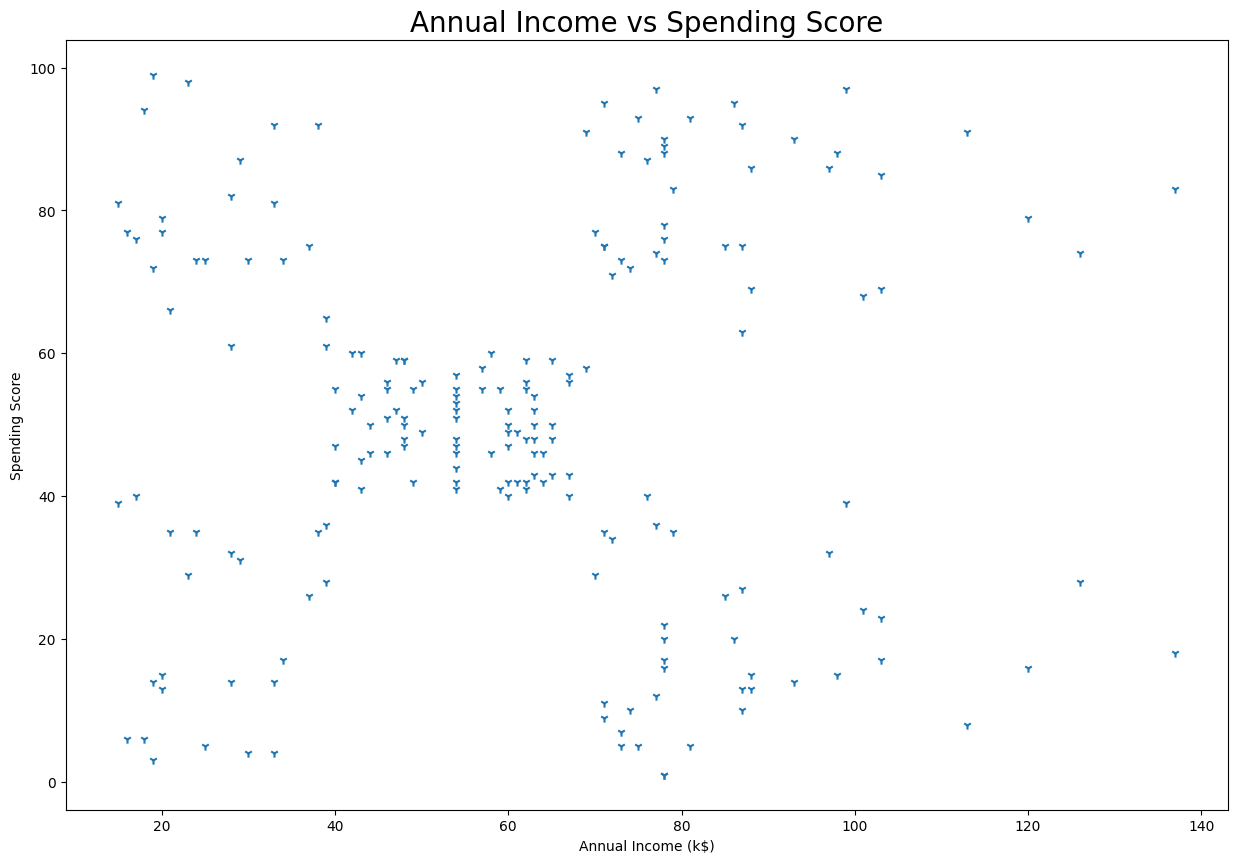

In [15]:
plt.figure(figsize=(15,10))
plt.scatter(copy_df['Annual Income (k$)'],copy_df['Spending Score (1-100)'], marker= '1')
plt.title("Annual Income vs Spending Score", fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

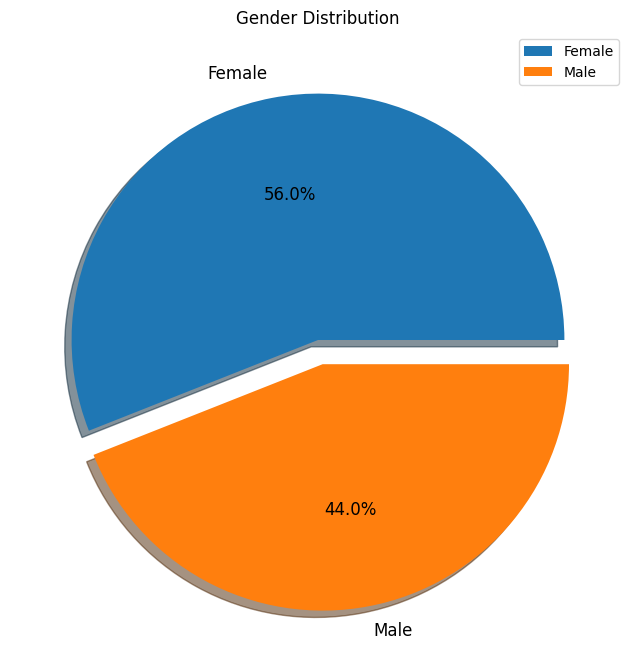

In [17]:
gender_dis = copy_df.groupby('Gender').size()
plt.figure(figsize=(9,8))
plt.title('Gender Distribution')
plt.pie(gender_dis,explode = (0,0.1),autopct = '%.1f%%',labels = gender_dis.index,shadow = True,textprops = {'fontsize': 12})
plt.legend()
plt.show()

In [19]:
copy_df['Gender']=LabelEncoder().fit_transform(copy_df['Gender'])
copy_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [27]:
col = copy_df[['Annual Income (k$)','Spending Score (1-100)']].values

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

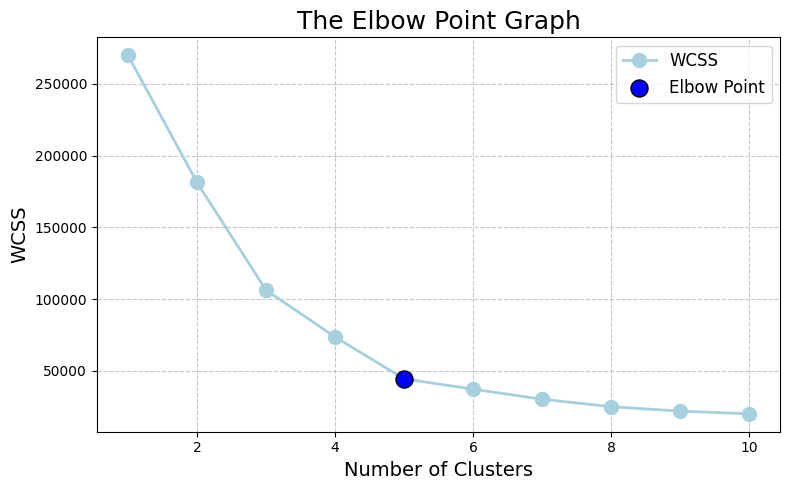

In [31]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(col)

  wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='#A6D0DD', markersize=10, linewidth=2, label='WCSS')

plt.title('The Elbow Point Graph', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)

elbow_point = 5
plt.scatter(elbow_point, wcss[elbow_point-1], color='blue', s=150, zorder=5, edgecolor='black', label='Elbow Point')

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## TRAIN TESTING MODEL

In [32]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y_pred = kmeans.fit_predict(col)
Y_pred

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

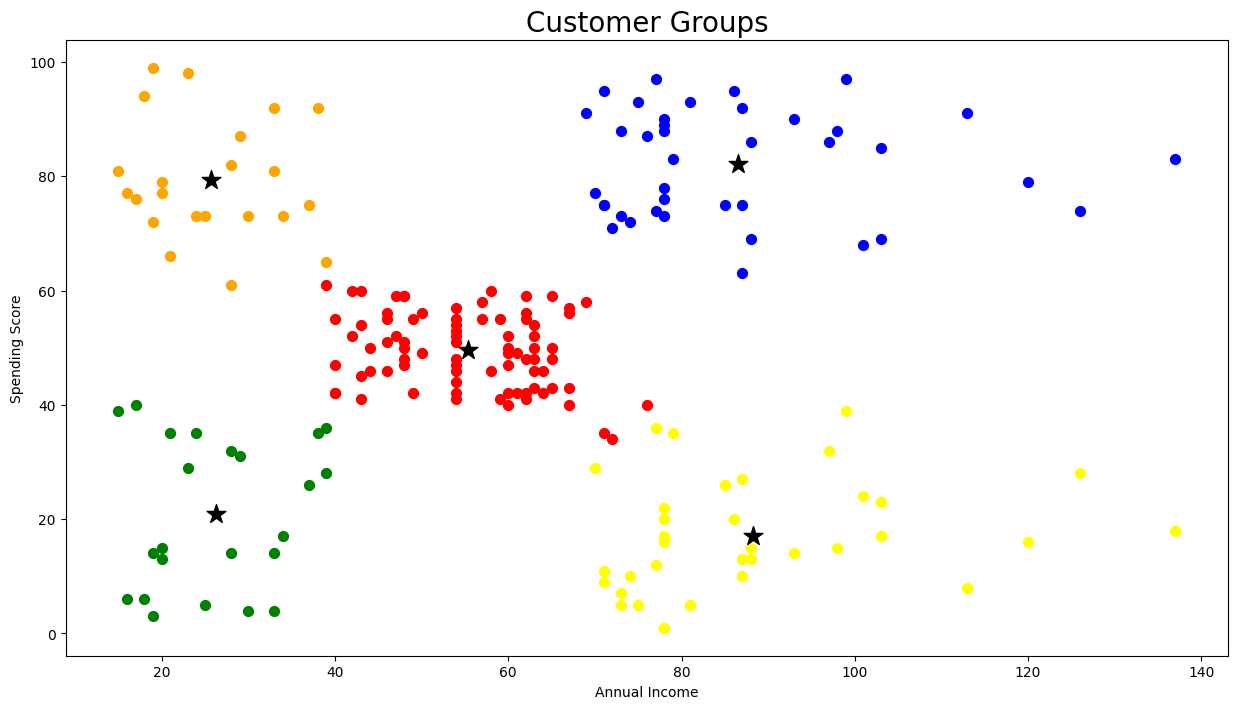

In [33]:
plt.figure(figsize=(15,8))
plt.scatter(col[Y_pred==0,0], col[Y_pred==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(col[Y_pred==1,0], col[Y_pred==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(col[Y_pred==2,0], col[Y_pred==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(col[Y_pred==3,0], col[Y_pred==3,1], s=50, c='green', label='Cluster 4')
plt.scatter(col[Y_pred==4,0], col[Y_pred==4,1], s=50, c='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', marker = '*', label='Centroids')
plt.title('Customer Groups',fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()